# 0. Introdução

**Trabalho Clustering**:

Aluno: Gabriel Luiz

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois datasets rotulados.
- Realize a análise estatística, visualização e pré-processamento dos
dados.
- Realize os experimentos criando duas bases de teste distintas:
- - considerando todos os atributos do dataset;
- - selecionando alguns atributos e descartando outros.
- Aplique três métodos de classificação distintos nas duas bases
acima referentes a cada dataset.
- Para cada dataset, em cada uma das bases, analise os resultados
segundo medidas de qualidade de classificação, usando índices de
validação externa (acurácia, recall, precisão, F-measure, índice
Kappa) e cruva ROC.
- Proponha uma maneira adicional de comparar os resultados obtidos
além das medidas acima.
- Compare e interprete os resultados dos dois experimentos em cada
dataset. Faça tabela com as medidas de validação

## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [183]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.cluster import *
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

# KFold
from sklearn.model_selection import KFold
import random

# Classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from  sklearn.metrics  import  roc_auc_score
from sklearn.metrics import balanced_accuracy_score


# 1. Dados

Para realização das tarefas envolvidas neste relatório utilizou-se o arquivo **dim032.csv** que contém dados não descritos, onde foram feitos para a realização de clustering que se encontram no site:
http://cs.uef.fi/sipu/datasets/

## 1.1 Carregamento do arquivo

In [184]:
from clustering.labelMatch import rotulos, labelmatch
dataset = './dataset/dim128/dim128.csv'
clusters = './dataset/dim128/dim128pa.csv'

In [185]:
data = pd.read_csv(
    dataset,
    header = None
    )

label = pd.read_csv(
    clusters,
    header = None
    )

In [186]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,145,142,131,135,208,209,65,128,183,131,...,199,218,182,53,144,198,93,34,99,79
1,149,148,137,137,213,209,71,125,183,125,...,198,222,182,52,148,198,97,35,99,78
2,151,144,135,132,210,208,67,124,183,128,...,198,218,182,52,144,196,93,38,101,78
3,148,141,136,135,207,209,65,127,184,130,...,197,219,184,50,144,198,92,36,101,82
4,146,145,136,135,208,212,70,130,185,129,...,199,217,182,52,148,198,95,36,96,80


In [187]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,...,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,125.248047,150.040039,134.053711,134.069336,118.694336,145.112305,125.099609,117.110352,108.508789,126.273438,...,145.520508,133.936523,130.793945,136.500000,136.348633,117.336914,123.756836,99.931641,110.326172,151.151367
std,51.254859,48.465458,49.652222,38.661577,54.941676,44.562082,51.200904,48.900247,51.715931,50.317170,...,54.379262,55.852890,58.455433,52.589374,51.880328,60.981599,46.710213,49.196389,60.645574,49.358342
min,31.000000,45.000000,42.000000,46.000000,35.000000,65.000000,52.000000,41.000000,31.000000,41.000000,...,34.000000,42.000000,41.000000,47.000000,30.000000,32.000000,25.000000,27.000000,30.000000,58.000000
25%,89.500000,129.500000,104.500000,100.750000,76.500000,111.250000,66.000000,72.000000,68.000000,89.000000,...,105.750000,90.750000,83.000000,103.500000,100.250000,60.750000,94.000000,63.000000,54.750000,114.750000
50%,117.000000,145.000000,142.000000,139.500000,111.000000,143.000000,130.000000,116.000000,100.000000,121.500000,...,150.500000,133.000000,111.500000,134.000000,133.000000,113.500000,124.000000,87.500000,98.000000,179.500000
75%,158.500000,191.000000,174.000000,167.000000,158.000000,180.000000,171.250000,152.250000,137.250000,176.000000,...,194.000000,187.000000,195.750000,184.500000,187.000000,181.250000,159.000000,128.250000,168.000000,190.000000
max,220.000000,225.000000,205.000000,195.000000,227.000000,218.000000,207.000000,220.000000,207.000000,218.000000,...,223.000000,224.000000,222.000000,218.000000,218.000000,209.000000,210.000000,194.000000,215.000000,204.000000


# 2. Pré-processamento

#### Validações efetivadas:
- 1. Dados faltantes representados por "NaN"
- 2. Dados que não possuem valores númericos

In [188]:
# data.isna().sum()

In [189]:
# for col in data:
    # print(col, data[col].unique())

#### 2.1 Conclusão:
- Os dados não possuem a necessidade de pré-processamento visto que já estão todos com valores validos

###  2.3 Análise estatística

In [190]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1.000000,-0.298556,0.099976,0.022622,0.147617,0.121319,-0.126459,0.467975,0.279398,-0.138266,...,-0.357315,-0.012444,0.125286,0.218881,-0.253469,0.034045,0.463972,-0.023602,-0.188079,0.311024
1,-0.298556,1.000000,-0.185263,0.432802,-0.292705,0.061192,-0.019780,0.016283,-0.213111,0.143765,...,-0.173967,0.247016,0.633308,0.059660,0.505386,0.016683,-0.548772,0.217301,0.429549,-0.073918
2,0.099976,-0.185263,1.000000,0.067625,0.362365,-0.028879,0.080121,0.012888,0.007419,0.235775,...,0.223319,-0.231223,-0.192837,0.184547,0.445270,-0.044062,0.567061,-0.184789,-0.021832,0.222362
3,0.022622,0.432802,0.067625,1.000000,0.099326,-0.144059,-0.112927,0.266907,-0.429601,-0.028823,...,-0.416790,-0.262267,0.586108,-0.148362,0.295559,-0.358739,-0.241791,0.213103,-0.361639,-0.177917
4,0.147617,-0.292705,0.362365,0.099326,1.000000,0.293487,-0.131999,-0.170449,0.577666,-0.063625,...,0.227436,-0.035686,0.014784,-0.217203,0.237352,0.033921,0.189920,-0.551513,0.109259,-0.318805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.034045,0.016683,-0.044062,-0.358739,0.033921,0.005289,0.050475,-0.220242,0.284786,-0.384904,...,-0.014952,0.285386,-0.044914,0.278613,0.218825,1.000000,-0.225108,-0.049457,0.195657,-0.273943
124,0.463972,-0.548772,0.567061,-0.241791,0.189920,-0.258597,0.129884,0.046233,0.049035,0.115393,...,0.125422,-0.340187,-0.507953,0.413947,-0.233779,-0.225108,1.000000,-0.204440,-0.045870,0.515130
125,-0.023602,0.217301,-0.184789,0.213103,-0.551513,-0.268762,0.541192,0.318943,-0.447063,0.044297,...,-0.288177,0.100666,0.075201,-0.131423,-0.175185,-0.049457,-0.204440,1.000000,0.001906,0.355830
126,-0.188079,0.429549,-0.021832,-0.361639,0.109259,0.058695,0.386794,-0.197502,0.433910,0.145782,...,0.329098,0.320879,-0.103570,0.085155,0.183157,0.195657,-0.045870,0.001906,1.000000,0.143927


In [191]:
df = data
df = df.assign(label = label)
test = df[[0, 1, 2, 3, 'label']]
test

,0,1,2,3,label
0,145,142,131,135,1
1,149,148,137,137,1
2,151,144,135,132,1
3,148,141,136,135,1
4,146,145,136,135,1
...,...,...,...,...,...
1019,172,55,146,85,16
1020,172,54,147,91,16
1021,179,47,149,86,16
1022,176,50,148,86,16


In [ ]:
sns.pairplot(df, diag_kind="kde",hue='label')

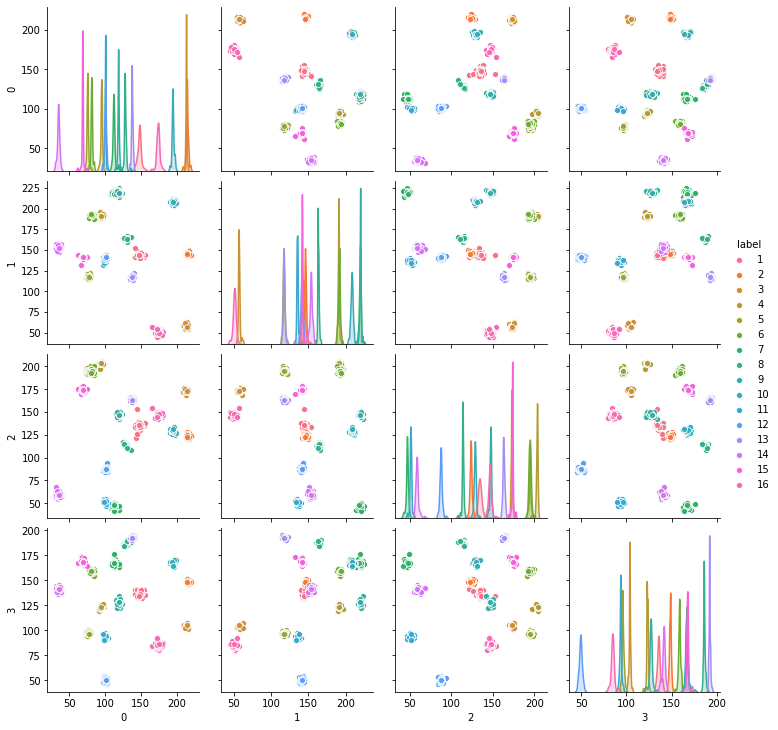

In [192]:
sns.pairplot(test, diag_kind="kde",hue='label')

### 2.4 Escalonando

Para aplicação dos algoritmos escalona-se os dados afim de parametriza-los num certo intervalor (-1 a 1)

In [193]:
data = data.to_numpy()
scaler = StandardScaler().fit(data)
data_scaler = scaler.transform(data)

In [194]:
# data_scaled = pd.DataFrame(data_scaler)
# data_scaled.head()

In [195]:
data_results = np.array(label[0].tolist())
for idx, value in np.ndenumerate(data_results):
    data_results[idx] = value - 1

### 2.5 Plotando boxsplot

Pelo boxsplot é possivel visualizar que há alguns outliers.

In [196]:
# data_scaled.plot(kind = 'box', figsize=(30,10), rot=90, )

## 3.2 Selecionando atributos do dataset

In [197]:
data_reduzida = pd.DataFrame(SelectKBest(chi2, k=30).fit_transform(data, label))
data_reduzida.shape
data_reduzida = data_reduzida.to_numpy()

data_scaler2 = scaler.fit_transform(X = data_reduzida)

In [198]:
# data_scaled2 = pd.DataFrame(data_scaler2)
# data_scaled2.head()



## Classificando

## Funções necessárias

In [199]:
def calcula_metricas(metricas, y_test, y_predict):
    metricas['acc'] += (accuracy_score(y_test, y_predict))
    metricas['recall'] += (recall_score(y_test, y_predict, average='micro'))
    metricas['precision'] += (precision_score(y_test, y_predict, average='macro'))
    metricas['f1'] += f1_score(y_test, y_predict, average='weighted')
    # metricas['roc'] += roc_auc_score(y_test, y_predict)
    metricas['kappa'] += cohen_kappa_score(y_test, y_predict)
    metricas['balanced_acc'] += balanced_accuracy_score(y_test, y_predict)

In [200]:
def save_metricas(name, metricas):
    f = open(name, 'w')
    f.write('Acuária:' + str(metricas['acc']) + '\n')
    f.write('Recall:' + str(metricas['recall']) + '\n')
    f.write('Precisão:' + str(metricas['precision']) + '\n')
    f.write('F-Measure:' + str(metricas['f1']) + '\n')
    # f.write('Curva Roc:' + str(metricas['roc']) + '\n')
    f.write('Indice Kappa:' + str(metricas['kappa']) + '\n')
    f.write('Acuária Balanceada:' + str(metricas['balanced_acc']) + '\n')
    f.close()

In [201]:
def show_metricas(metricas):
    print('Acuária:', metricas['acc'])
    print('Recall:', metricas['recall'])
    print('Precisão:', metricas['precision'])
    print('F-Measure:', metricas['f1'])
    # print('Curva Roc:', metricas['roc'])
    print('Indice Kappa:', metricas['kappa'])
    print('Acuária Balanceada:', metricas['balanced_acc'])

In [202]:
def write_metricas(name_file, metricas, metodo):
    f = open(name_file, "a")
    f.write(metodo + ',')
    f.write(str(round(metricas['acc'],4)) + ',')
    f.write(str(round(metricas['recall'],4)) + ',')
    f.write(str(round(metricas['precision'],4)) + ',')
    f.write(str(round(metricas['f1'],4)) + ',')
    # f.write(str(round(metricas['roc'],4)) + ';')
    f.write(str(round(metricas['kappa'],4)) + ',')
    f.write(str(round(metricas['balanced_acc'],4)) + '\n')
    f.close()


## DataFrame Completo

In [203]:
# TODO change split function
kf = KFold(n_splits=2, shuffle=True, random_state=random.randint(0, 10))
data_kfold = kf.split(data)

train = []
test = []

for train_index, test_index in data_kfold:
    train.append(train_index)
    test.append(test_index)

In [204]:
name_file = 'metricas.csv'

# Roc;
f = open(name_file, "w")
f.write('Acurácia,Recall,Precisão,F1,Kappa,Acurácia Balanceada\n')
f.close()

## Aplicando KNN com  train_test_split
~kfold~ (era k-fold)

K Nearest neighbor (K-ésimo Vizinho mais Próximo)

In [205]:

# 'roc': 0,
metodo = 'KNN'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train)

y_predict = neigh.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [206]:
# # 'roc': 0,
# metodo = 'KNN'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler[train_index], data_scaler[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     neigh = KNeighborsClassifier(n_neighbors=100)
#     neigh.fit(x_train, y_train)
#
#     y_predict = neigh.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando GaussianNB

(Classificador Gaussiano Naïve Bayesiano)

In [207]:
metodo = 'Gauss'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}


x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

gauss = GaussianNB()
gauss.fit(x_train, y_train)

y_predict = gauss.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [208]:
# metodo = 'Gauss'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler[train_index], data_scaler[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     gauss = GaussianNB()
#     gauss.fit(x_train, y_train)
#
#     y_predict = gauss.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando DecisionTreeClassifier

Árvores de Decisão

In [209]:
metodo = 'Tree'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_predict = tree.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 0.99609375
Recall: 0.99609375
Precisão: 0.9955357142857143
F-Measure: 0.996103083930705
Indice Kappa: 0.9958187015108207
Acuária Balanceada: 0.99609375


In [210]:
# metodo = 'Tree'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler[train_index], data_scaler[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     tree = DecisionTreeClassifier()
#     tree.fit(x_train, y_train)
#
#     y_predict = tree.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando SVM

Máquinas de Vetores de Suporte (SVMs)

In [211]:
metodo = 'SVM'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

svm = SVC()
svm.fit(x_train, y_train)

y_predict = svm.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [212]:
# metodo = 'SVM'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler[train_index], data_scaler[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     svm = SVC()
#     svm.fit(x_train, y_train)
#
#     y_predict = svm.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## DataFrame Selecionado

## Aplicando

In [213]:
kf = KFold(n_splits=2, shuffle=True, random_state=random.randint(0, 10))
data_kfold = kf.split(data_scaler2)

train = []
test = []

for train_index, test_index in data_kfold:
    train.append(train_index)
    test.append(test_index)

## Aplicando KNN

In [214]:
metodo = 'KNNSELECT'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train)

y_predict = neigh.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [215]:
# metodo = 'KNNSELECT'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler2[train_index], data_scaler2[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     neigh = KNeighborsClassifier(n_neighbors=20)
#     neigh.fit(x_train, y_train)
#
#     y_predict = neigh.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando GaussianNB

In [216]:
metodo = 'GaussSELECT'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

gauss = GaussianNB()
gauss.fit(x_train, y_train)

y_predict = gauss.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [217]:
# metodo = 'GaussSELECT'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler2[train_index], data_scaler2[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     gauss = GaussianNB()
#     gauss.fit(x_train, y_train)
#
#     y_predict = gauss.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando DecisionTreeClassifier

In [218]:
metodo = 'TreeSELECT'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_predict = tree.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 0.98828125
Recall: 0.98828125
Precisão: 0.9872596153846154
F-Measure: 0.9883769914215685
Indice Kappa: 0.9874741082641528
Acuária Balanceada: 0.9899305555555555


In [219]:
# metodo = 'TreeSELECT'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler2[train_index], data_scaler2[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     tree = DecisionTreeClassifier()
#     tree.fit(x_train, y_train)
#
#     y_predict = tree.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando SVM

In [220]:
metodo = 'SVMSELECT'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

svm = SVC()
svm.fit(x_train, y_train)

y_predict = svm.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [221]:
# metodo = 'SVMSELECT'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler2[train_index], data_scaler2[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     svm = SVC()
#     svm.fit(x_train, y_train)
#
#     y_predict = svm.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

In [222]:
analise = './metricas.csv'
metricas = pd.read_csv(
    analise,
    )
metricas

,Acurácia,Recall,Precisão,F1,Kappa,Acurácia Balanceada
KNN,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Gauss,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Tree,0.9961,0.9961,0.9955,0.9961,0.9958,0.9961
SVM,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
KNNSELECT,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
GaussSELECT,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
TreeSELECT,0.9883,0.9883,0.9873,0.9884,0.9875,0.9899
SVMSELECT,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
